<h1>Artigo SBBD 2020</h1>

<h3>Harbinger: um <i>framework</i> para detecção de eventos em séries temporais </h3>

- A detecção de eventos em séries temporais é caracterizada pela mudança do comportamento da série. Um evento pode ser a ocorrência de uma anomalia ou um ponto de mudança, por exemplo. <br>
- Para detectar eventos em séries temporais foi desenvolvido o Harbinger, um framework cujas funcionalidades ajudam a nortear a escolha de métodos de detecção apropriados para uma determinada série temporal e contribuem para a compreensão da semântica dos eventos detectados. A avaliação de seu desempenho foi feita em dados sintéticos e reais. <br>
- Além de facilitar a inclusão de métodos e a padronização dos resultados obtidos, permite otimizar hiperparâmetros e definir métricas para comparação de resultados.

<h3><i>Framework</i></h3>

O <i>framework</i> possui métodos selecionados da literatura, permitindo sua implementação e execução em um mesmo formato de entrada e saída de dados. Também é permitido ao usuário definir seus próprios métodos de detecção, conforme a necessidade, e suas principais funcionalidades são:
<list>
    1. detecção de eventos em séries temporais, através da função evtdet.
    2. avaliação da qualidade da detecção pela função evaluate.
</list>

<h3> Dataset utilizado

Foi utilizado na análise o conjunto de dados criado para o GECCO Challenge 2018. Para compor este conjunto, foram selecionadas $1500$ observações coletadas a cada minuto contendo $72$ eventos identificados. Foram coletadas $9$ variáveis relacionadas à qualidade da água, das quais $5$ foram selecionadas por apresentar maior variabilidade em suas observações. São elas $Tp$, $pH$, $Redox$, $Leit$ e $Trueb$, representando a temperatura, PH, potencial Redox, condutividade elétrica e turvação, respectivamente.

Também foi selecionado o conjunto de dados criado por $Yahoo Labs$. Este consiste de observações coletadas por hora contendo anomalias identificadas manualmente por editores. Uma parte dos dados é sintética e outra é baseada no tráfego real dos serviços do Yahoo. O conjunto de dados é dividido em quatro, sendo $A1$ composto pelos dados reais e $A2$, $A3$ e $A4$ por dados sintéticos.

<h3>Carregar funções:</h3>

In [8]:
source("~/evtdet.R")

<h3>Carregar dataset de qualidade da água:</h3>

In [9]:
library(EventDetectR)
train <- geccoIC2018Train[16500:18000,]

Para utilizar o framework, precisamos de dois dataframes: um com uma série de tempo e a outra onde serão procurados os eventos, e outro com a série de tempo e os eventos marcados (as referências, ou gabarito)

<h3>Variável Trueb</h3>

In [11]:
test <- subset(train, select=c(Time, Trueb))
reference <- subset(train, select=c(Time, EVENT))

<h3>Detecção de eventos usando o <i>ChangeFinder</i>:</h3>

In [12]:
events_cp_v3 <- evtdet.changepoints_v3(test,mdl=linreg,m=5,na.action=na.omit)

Obtendo métricas a partir da função <i>evaluate</i>:

<h3>Matriz de Confusão</h3>

In [13]:
evaluate(events_cp_v3, reference, metric="confusion_matrix")

Registered S3 methods overwritten by 'survival':
  method       from 
  nobs.coxph   MuMIn
  nobs.survreg MuMIn


          Reference
Prediction FALSE TRUE
     FALSE  1297   16
     TRUE    132   56

<h3>F1</h3>

In [20]:
evaluate(events_cp_v3, reference, metric="F1")

F1 
0.9460248

<h3>Plot</h3>

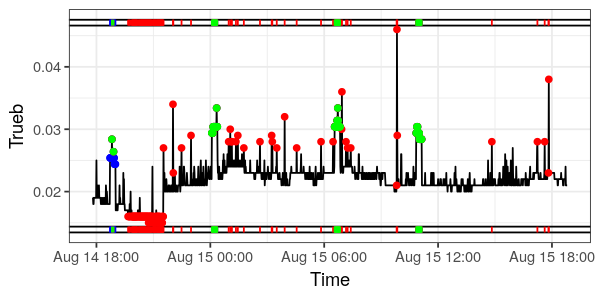

In [19]:
options(repr.plot.width = 5, repr.plot.height = 2.5)
evtplot(test, events_cp_v3, reference)